In [1]:
# Week 2 - Data Preprocessing and Emission Model

import pandas as pd
import numpy as np

# Create sample dataset
data = {
    'route_id': [1, 2, 3, 4, 5],
    'source': ['A', 'B', 'C', 'D', 'E'],
    'destination': ['B', 'C', 'D', 'E', 'F'],
    'distance_km': [10, 25, 15, 40, 30],
    'avg_speed': [40, 50, 35, 60, 45],
    'vehicle_type': ['car', 'bus', 'bike', 'car', 'bus'],
    'traffic': ['low', 'medium', 'high', 'medium', 'low'],
    'elevation_gain_m': [50, 120, 80, 200, 150]
}

df = pd.DataFrame(data)
df.to_csv('../data/sample_routes.csv', index=False)
df.head()


,route_id,source,destination,distance_km,avg_speed,vehicle_type,traffic,elevation_gain_m
0,1,A,B,10,40,car,low,50
1,2,B,C,25,50,bus,medium,120
2,3,C,D,15,35,bike,high,80
3,4,D,E,40,60,car,medium,200
4,5,E,F,30,45,bus,low,150


In [2]:
# Load dataset
import pandas as pd

df = pd.read_csv('../data/sample_routes.csv')
print("✅ Dataset Loaded Successfully!\n")
print(df.head())

# Basic info
print("\n🔍 Dataset Info:")
print(df.info())


✅ Dataset Loaded Successfully!

   route_id source destination  distance_km  avg_speed vehicle_type traffic  \
0         1      A           B           10         40          car     low   
1         2      B           C           25         50          bus  medium   
2         3      C           D           15         35         bike    high   
3         4      D           E           40         60          car  medium   
4         5      E           F           30         45          bus     low   

   elevation_gain_m  
0                50  
1               120  
2                80  
3               200  
4               150  

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   route_id          5 non-null      int64 
 1   source            5 non-null      object
 2   destination       5 non-null      object
 3   distance_

In [3]:
# Encode categorical data
traffic_map = {'low': 1, 'medium': 2, 'high': 3}
vehicle_map = {'bike': 1, 'car': 2, 'bus': 3}

df['traffic_level'] = df['traffic'].map(traffic_map)
df['vehicle_code'] = df['vehicle_type'].map(vehicle_map)

print("✅ Encoded columns added!\n")
print(df[['traffic', 'traffic_level', 'vehicle_type', 'vehicle_code']])


✅ Encoded columns added!

  traffic  traffic_level vehicle_type  vehicle_code
0     low              1          car             2
1  medium              2          bus             3
2    high              3         bike             1
3  medium              2          car             2
4     low              1          bus             3


In [4]:
# Estimate CO₂ emissions (grams of CO₂ per route)
def calculate_emission(row):
    base_factor = 100  # arbitrary scaling constant
    emission = base_factor * row['distance_km'] * (
        0.8 * row['vehicle_code'] + 
        0.5 * row['traffic_level'] + 
        0.001 * row['elevation_gain_m']
    )
    return emission

df['estimated_emission'] = df.apply(calculate_emission, axis=1)

print("✅ Emission column added!\n")
df.head()


✅ Emission column added!



,route_id,source,destination,distance_km,avg_speed,vehicle_type,traffic,elevation_gain_m,traffic_level,vehicle_code,estimated_emission
0,1,A,B,10,40,car,low,50,1,2,2150.0
1,2,B,C,25,50,bus,medium,120,2,3,8800.0
2,3,C,D,15,35,bike,high,80,3,1,3570.0
3,4,D,E,40,60,car,medium,200,2,2,11200.0
4,5,E,F,30,45,bus,low,150,1,3,9150.0


In [5]:
# Drop unnecessary columns
clean_df = df.drop(columns=['traffic', 'vehicle_type'])

# Save cleaned dataset
clean_df.to_csv('../data/clean_routes.csv', index=False)
print("✅ Clean dataset saved as 'clean_routes.csv'!")


✅ Clean dataset saved as 'clean_routes.csv'!


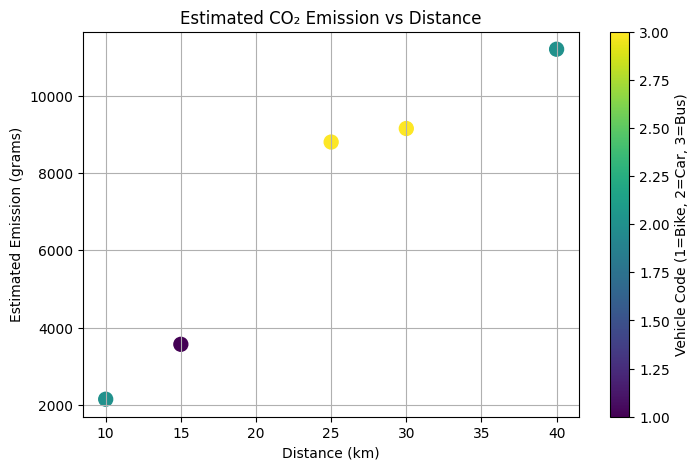

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['distance_km'], df['estimated_emission'], c=df['vehicle_code'], cmap='viridis', s=100)
plt.title('Estimated CO₂ Emission vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Estimated Emission (grams)')
plt.colorbar(label='Vehicle Code (1=Bike, 2=Car, 3=Bus)')
plt.grid(True)
plt.show()
